In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt1
import seaborn as sns
from math import sqrt
from scipy.stats import norm
import scipy
import random
%matplotlib inline

df = pd.read_csv("athlete_events.csv")

In [2]:
print(df)

            ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5            Christine Jacoba Aaftink   F  21.0   185.0    82.0   
5            5            Christine Jacoba Aaftink   F  21.0   185.0    82.0   
6            5            Christine Jacoba Aaftink   F  25.0   185.0    82.0   
7            5            Christine Jacoba Aaftink   F  25.0   185.0    82.0   
8            5            Christine Jacoba Aaftink   F  27.0   185.0    82.0   
9            5            Christine Jacoba Aaftink   F  27.0   185.0    82.0   
10           6                     Per Knut Aaland   M  31.0   188.0    75.0   
11           6                     Per K

In [3]:
df.describe() #basic statistical details of each numerical attribute

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [17]:
print(df['Name'].value_counts())  #Count the number of times each value is repeated

Robert Tait McKenzie                     58
Heikki Ilmari Savolainen                 39
Joseph "Josy" Stoffel                    38
Ioannis Theofilakis                      36
Takashi Ono                              33
Alexandros Theofilakis                   32
Jean Lucien Nicolas Jacoby               32
Andreas Wecker                           32
Alfrd (Arnold-) Hajs (Guttmann-)         32
Johann "Hans" Sauter                     31
Alfred James Munnings                    31
Alfred August "Al" Jochim                31
Michel Mathiot                           31
Karl Tore William Thoresson              30
Yordan Yovchev Yovchev                   30
Michael Fred Phelps, II                  30
Oksana Aleksandrovna Chusovitina         29
Ivan Joseph Martin Osiier                29
Miltiades Manno                          28
Ole Einar Bjrndalen                      27
Adrianus Egbert Willem "Arie" de Jong    27
Aleksandr Vladimirovich Popov            26
Lars Jrgen Madsen               

In [3]:
print(df['Sex'].value_counts())  #The number of male and female participants

M    196594
F     74522
Name: Sex, dtype: int64


In [4]:
df.dtypes # data type of each column in  the dataset

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [5]:
print(df.columns) #Names of the columns
count_row = df.shape[0]
print(count_row) #Number of rows

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')
271116


In [6]:
# Numerical Missing Values
a=df['Height'].isnull().sum()
b=df['Weight'].isnull().sum()
c=df['Age'].isnull().sum()
print("Missing value in Height column = ",a)
print("Percentage of missing values in Height column=",a/df.shape[0]*100)
print("Missing value in Weight column = ",b)
print("Percentage of missing values in Weight column=",b/df.shape[0]*100)
print("Missing value in Age column = ",b)
print("Percentage of missing values in Age column=",c/df.shape[0]*100)

Missing value in Height column =  60171
Percentage of missing values in Height column= 22.193821095029435
Missing value in Weight column =  62875
Percentage of missing values in Weight column= 23.19118015904631
Missing value in Age column =  62875
Percentage of missing values in Age column= 3.49444518213606


In [17]:
#Interpolation of immediate data before and after it (average is taken)
df=df.interpolate()
print(df['Age'])

0         24.0
1         23.0
2         24.0
3         34.0
4         21.0
5         21.0
6         25.0
7         25.0
8         27.0
9         27.0
10        31.0
11        31.0
12        31.0
13        31.0
14        33.0
15        33.0
16        33.0
17        33.0
18        31.0
19        31.0
20        31.0
21        31.0
22        33.0
23        33.0
24        33.0
25        33.0
26        18.0
27        18.0
28        26.0
29        26.0
          ... 
271086    23.0
271087    19.0
271088    19.0
271089    34.0
271090    38.0
271091    32.0
271092    21.0
271093    21.0
271094    25.0
271095    25.0
271096    29.0
271097    29.0
271098    33.0
271099    36.0
271100    26.0
271101    24.0
271102    19.0
271103    23.0
271104    22.0
271105    23.0
271106    27.0
271107    21.0
271108    24.0
271109    28.0
271110    33.0
271111    29.0
271112    27.0
271113    27.0
271114    30.0
271115    34.0
Name: Age, Length: 271116, dtype: float64


In [4]:
# Categorical Missing Values
d=df['City'].isnull().sum()
print("Missing value in City column = ",d)
print("Percentage of missing values in City column=",d/df.shape[0]*100)

Missing value in City column =  119
Percentage of missing values in City column= 0.04389265111612741


In [5]:
print(df['City'])

0              Barcelona
1                 London
2              Antwerpen
3                  Paris
4                Calgary
5                Calgary
6                    NaN
7            Albertville
8            Lillehammer
9            Lillehammer
10           Albertville
11           Albertville
12                   NaN
13           Albertville
14           Lillehammer
15           Lillehammer
16           Lillehammer
17           Lillehammer
18           Albertville
19           Albertville
20           Albertville
21           Albertville
22           Lillehammer
23           Lillehammer
24           Lillehammer
25           Lillehammer
26           Los Angeles
27           Los Angeles
28        Salt Lake City
29              Helsinki
               ...      
271086               NaN
271087            Moskva
271088            Moskva
271089           Beijing
271090            London
271091            London
271092       Lillehammer
271093       Lillehammer
271094            Nagano


In [6]:
# Replacing categorical NaNs with most commonly appearing values
df['City'] = df['City'].fillna(df['City'].value_counts().index[0])

In [7]:
print(df['City'])

0              Barcelona
1                 London
2              Antwerpen
3                  Paris
4                Calgary
5                Calgary
6                 London
7            Albertville
8            Lillehammer
9            Lillehammer
10           Albertville
11           Albertville
12                London
13           Albertville
14           Lillehammer
15           Lillehammer
16           Lillehammer
17           Lillehammer
18           Albertville
19           Albertville
20           Albertville
21           Albertville
22           Lillehammer
23           Lillehammer
24           Lillehammer
25           Lillehammer
26           Los Angeles
27           Los Angeles
28        Salt Lake City
29              Helsinki
               ...      
271086            London
271087            Moskva
271088            Moskva
271089           Beijing
271090            London
271091            London
271092       Lillehammer
271093       Lillehammer
271094            Nagano


In [8]:
# Number of medals awarded
d=df['Medal'].isnull().sum()
print("Number of medals awarded = ",df.shape[0]-d)

print("Percentage of empty values in the medals column = ",d/df.shape[0]*100)

Number of medals awarded =  39783
Percentage of empty values in the medals column =  85.3262072323286


Average height of male participants =  178.31555581267386
Average height of female participants =  168.66640214383824


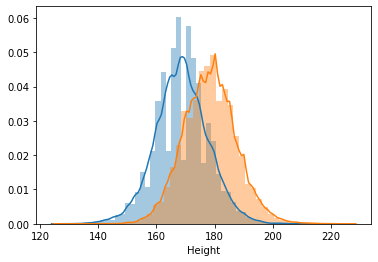

In [18]:
height1=0
height2=0
for i in range(0,271116):
    if df['Sex'][i]=='M':
        height1=height1+df['Height'][i]
    else:
        height2=height2+df['Height'][i]
height1=height1/196594
height2=height2/74522
(sns.distplot(df[df.Sex=='F'].Height),
sns.distplot(df[df.Sex=='M'].Height)
)
print("Average height of male participants = ",height1)
print("Average height of female participants = ",height2)

Average weight of male participants =  74.84730396302413
Average weight of female participants =  61.24981045453986


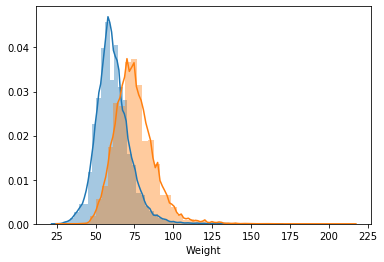

In [14]:
weight1=0
weight2=0
for i in range(0,271116):
    if df['Sex'][i]=='M':
        weight1=weight1+df['Weight'][i]
    else:
        weight2=weight2+df['Weight'][i]
weight1=weight1/196594
weight2=weight2/74522
(sns.distplot(df[df.Sex=='F'].Weight),
sns.distplot(df[df.Sex=='M'].Weight)
)
print("Average weight of male participants = ",weight1)
print("Average weight of female participants = ",weight2)

In [11]:
total_rows = df.shape[0]
unique_athletes = len(df.Name.unique())
medal_winners = len(df[df.Medal.fillna('None')!='None'].Name.unique())

print("Total athletes = ",total_rows)
print("Total number of unique athletes = ",unique_athletes)
print("Total number of medal winners = ",medal_winners)

Total athletes =  271116
Total number of unique athletes =  134732
Total number of medal winners =  28202


In [12]:
print(df[df.Medal.fillna('None')!='None'].Medal.value_counts())
df[df.Medal.fillna('None')!='None'].shape[0]

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64


39783

In [13]:
team_medal_count = df.groupby(['Team','Medal']).Medal.agg('count')
team_medal_count = team_medal_count.reset_index(name='count').sort_values(['count'], ascending=False)
team_medal_count.head(20)

,Team,Medal,count
726,United States,Gold,2474
727,United States,Silver,1512
725,United States,Bronze,1233
627,Soviet Union,Gold,1058
628,Soviet Union,Silver,716
263,Germany,Gold,679
262,Germany,Bronze,678
626,Soviet Union,Bronze,677
264,Germany,Silver,627
278,Great Britain,Silver,582


In [14]:
unique_countries = len(df.Team.unique())
print("No. of countries that have participated in the Olympic Games at one time or the other = ",unique_countries)

No. of countries that have participated in the Olympic Games at one time or the other =  1184


ConversionError: Failed to convert value(s) to axis units: ['United States', 'France', 'Great Britain', 'Soviet Union', 'Italy', 'Canada', 'Germany', 'Japan', 'Australia', 'Hungary']

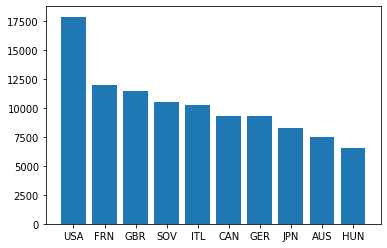

In [16]:
x = ["United States","France","Great Britain", "Soviet Union","Italy","Canada","Germany","Japan","Australia","Hungary"]
labels = ["USA", "FRN","GBR","SOV","ITL","CAN","GER","JPN","AUS","HUN"]
y=[]
for i in x:
    count=0
    for j in range(0,271116):
        if df['Team'][j]==i:
            count=count+1
    y.append(count)
for j in range(0,271116):
        if df['Team'][j]=='Russia':
            y[3]=y[3]+1

plt1.bar(x, y, align='center')
plt1.xticks(x,labels)    #optional to set the class names for the bars
plt1.yticks(x, y)     #optional to set the values of y axis
plt1.show()

        

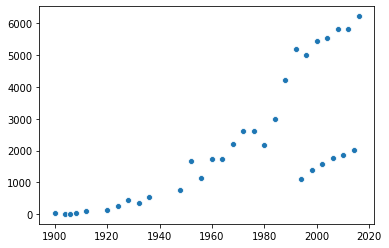

In [20]:
female = df[df.Sex=='F']
year_count = female.groupby('Year').agg('count')
years = list(year_count.index)
counts =  list(year_count.Name)
sns.scatterplot(x = years, y = counts)

(<matplotlib.axes._subplots.AxesSubplot at 0x210984d5b70>,
 <matplotlib.axes._subplots.AxesSubplot at 0x210984d5b70>)

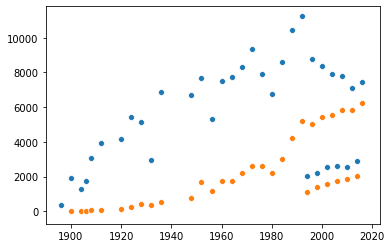

In [21]:
f_year_count = df[df.Sex=='F'].groupby('Year').agg('count').Name
m_year_count = df[df.Sex=='M'].groupby('Year').agg('count').Name
(sns.scatterplot(data= m_year_count),
 sns.scatterplot(data =f_year_count))

ConversionError: Failed to convert value(s) to axis units: ['Summer', 'Winter']

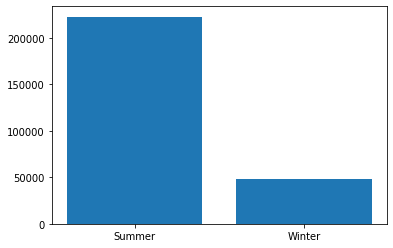

In [22]:
x=["Summer","Winter"]
labels=["Summer","Winter"]
y=[]
count1=0
count2=0
for j in range(0,271116):
    if df['Season'][j]==x[0]:
        count1=count1+1
    if df['Season'][j]==x[1]:
        count2=count2+1
y.append(count1)
y.append(count2)
plt1.bar(x, y, align='center')
plt1.xticks(x,labels)    
plt1.yticks(x, y)     
plt1.show()

In [23]:
df.Sport.value_counts()

Athletics                38624
Gymnastics               26707
Swimming                 23195
Shooting                 11448
Cycling                  10859
Fencing                  10735
Rowing                   10595
Cross Country Skiing      9133
Alpine Skiing             8829
Wrestling                 7154
Football                  6745
Sailing                   6586
Equestrianism             6344
Canoeing                  6171
Boxing                    6047
Speed Skating             5613
Ice Hockey                5516
Hockey                    5417
Biathlon                  4893
Basketball                4536
Weightlifting             3937
Water Polo                3846
Judo                      3801
Handball                  3665
Art Competitions          3578
Volleyball                3404
Bobsleigh                 3058
Tennis                    2862
Diving                    2842
Ski Jumping               2401
                         ...  
Badminton                 1457
Nordic C

In [24]:
team_medal_count = df.groupby(['Team','Medal']).Medal.agg('count')
team_medal_count = team_medal_count.reset_index(name='count').sort_values(['count'], ascending=False)
team_medal_count.head(15)

,Team,Medal,count
726,United States,Gold,2474
727,United States,Silver,1512
725,United States,Bronze,1233
627,Soviet Union,Gold,1058
628,Soviet Union,Silver,716
263,Germany,Gold,679
262,Germany,Bronze,678
626,Soviet Union,Bronze,677
264,Germany,Silver,627
278,Great Britain,Silver,582


In [25]:
def get_country_stats(country):
    return team_medal_count[team_medal_count.Team==country]

In [26]:
get_country_stats('Soviet Union')

,Team,Medal,count
627,Soviet Union,Gold,1058
628,Soviet Union,Silver,716
626,Soviet Union,Bronze,677


In [27]:
df[df.Team=='Croatia'].Year.unique()

array([2006, 1996, 2000, 1992, 2008, 2012, 2004, 2016, 2014, 2010, 2002,
       1998, 1994], dtype=int64)

In [28]:
get_country_stats('Croatia')

,Team,Medal,count
160,Croatia,Gold,58
161,Croatia,Silver,54
159,Croatia,Bronze,37


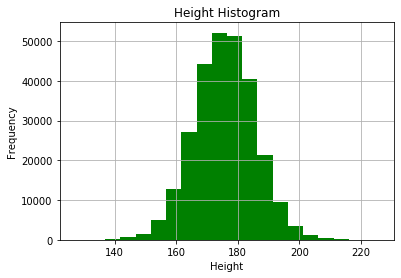

In [29]:
#Plotting Histogram
df['Height'].hist(histtype='stepfilled', color='green',bins=20)
plt1.xlabel('Height')
plt1.ylabel('Frequency')
plt1.title('Height Histogram')
plt1.show()

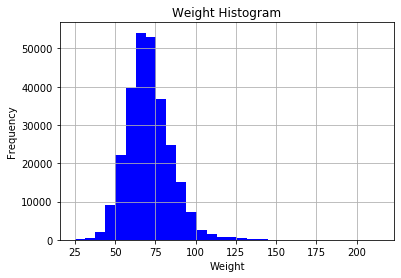

In [30]:
df['Weight'].hist(histtype='stepfilled', color='blue',bins=30)
plt1.xlabel('Weight')
plt1.ylabel('Frequency')
plt1.title('Weight Histogram')
plt1.show()

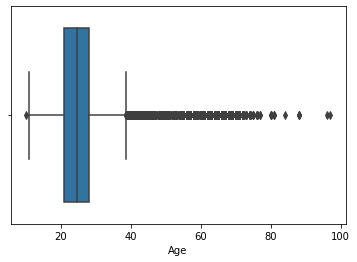

In [31]:
sns_plot = sns.boxplot(x=df['Age'])

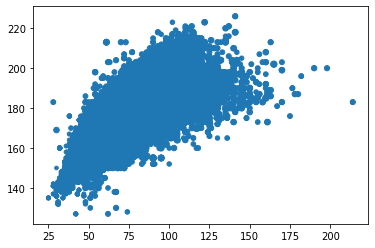

In [4]:
fig = plt1.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df['Weight'],df['Height'], s=df['Age']) # Added third variable income as size of the bubble
plt1.show()

In [5]:
print("Data visulisation through other plots")

Data visulisation through other plots


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("athlete_events.csv")
df_I=df.interpolate()
print(df_I)

            ID                                Name Sex   Age  Height  \
0            1                           A Dijiang   M  24.0   180.0   
1            2                            A Lamusi   M  23.0   170.0   
2            3                 Gunnar Nielsen Aaby   M  24.0   175.0   
3            4                Edgar Lindenau Aabye   M  34.0   180.0   
4            5            Christine Jacoba Aaftink   F  21.0   185.0   
5            5            Christine Jacoba Aaftink   F  21.0   185.0   
6            5            Christine Jacoba Aaftink   F  25.0   185.0   
7            5            Christine Jacoba Aaftink   F  25.0   185.0   
8            5            Christine Jacoba Aaftink   F  27.0   185.0   
9            5            Christine Jacoba Aaftink   F  27.0   185.0   
10           6                     Per Knut Aaland   M  31.0   188.0   
11           6                     Per Knut Aaland   M  31.0   188.0   
12           6                     Per Knut Aaland   M  31.0   1

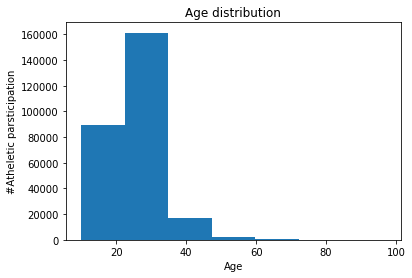

In [9]:
fig=plt.figure() #Plots in matplotlib reside within a figure object, use plt.figure to create new figure
#Create one or more subplots using add_subplot, because you can't create blank figure
ax = fig.add_subplot(1,1,1)
#Variable
ax.hist(df_I['Age'],bins = 7) # Here you can play with number of bins Labels and Tit
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('#Atheletic parsticipation')
plt.show()

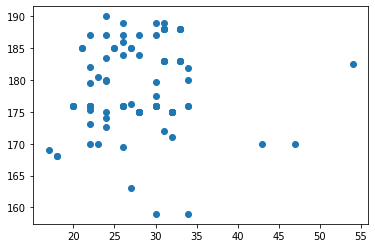

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("athlete_events.csv")
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
df1=df_I.head(100)
ax.scatter(df1['Age'],df1['Height']) #You can also add more variables here to represent color and size.
plt.show()

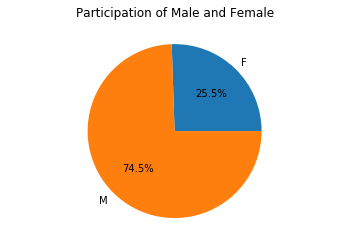

In [11]:
var=df_I.groupby(['Sex']).sum().stack()
temp=var.unstack()
type(temp)
x_list = temp['Age']
label_list = temp.index
plt.axis("equal") #The pie chart is oval by default. To make it a circle use pyplot.axis("equal")
#To show the percentage of each pie slice, pass an output format to the autopctparameter 
plt.pie(x_list,labels=label_list,autopct="%1.1f%%")
plt.title("Participation of Male and Female") 
plt.show()

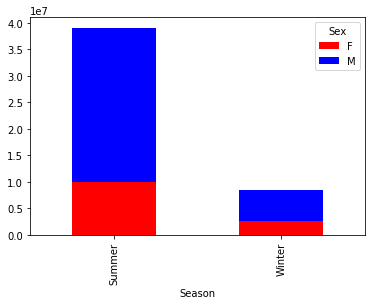

In [12]:
var = df_I.groupby(['Season','Sex']).Height.sum()
var.unstack().plot(kind='bar',stacked=True,  color=['red','blue'], grid=False)


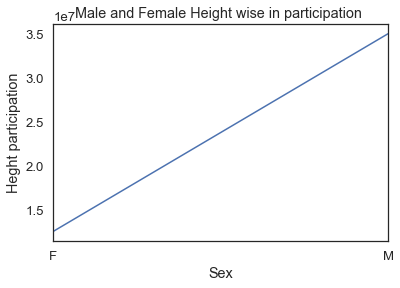

In [90]:
var = df_I.groupby('Sex').Height.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Sex')
ax1.set_ylabel('Heght participation')
ax1.set_title("Male and Female Height wise in participation ")
var.plot(kind='line')

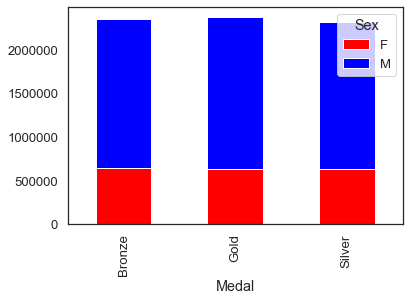

In [91]:
var = df_I.groupby(['Medal','Sex']).Height.sum()
var.unstack().plot(kind='bar',stacked=True,  color=['red','blue'], grid=False)


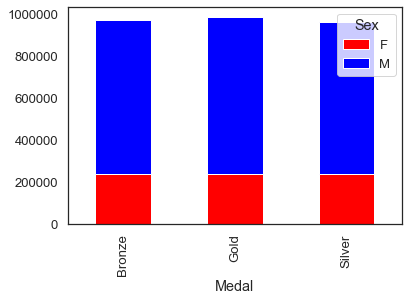

In [92]:
var = df_I.groupby(['Medal','Sex']).Weight.sum()
var.unstack().plot(kind='bar',stacked=True,  color=['red','blue'], grid=False)


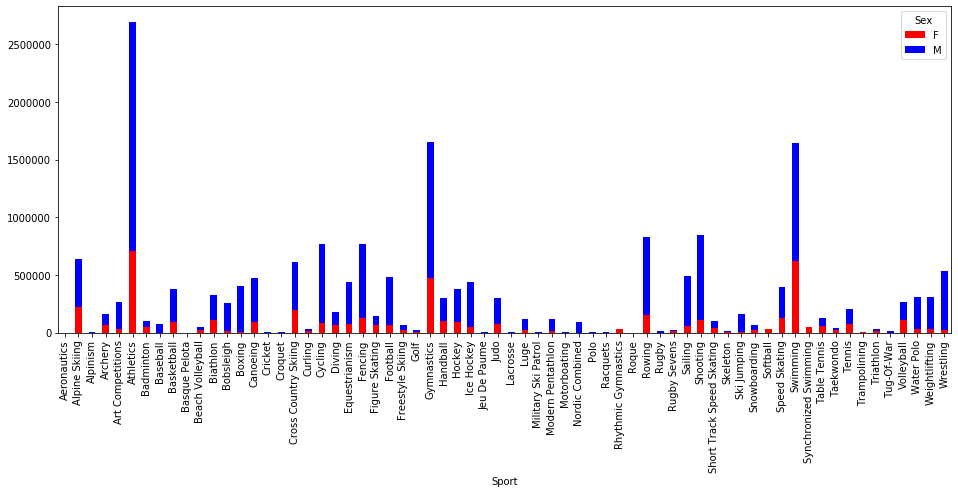

In [3]:
var = df_I.groupby(['Sport','Sex']).Weight.sum()

var.unstack().plot(kind='bar',figsize=(16,6),stacked=True,  color=['red','blue'], grid=False)


In [33]:
male_df = df[df.Sex=='M']
sport_weight_height_metrics = male_df.groupby(['Sport'])['Weight','Height'].agg(['min','max','mean'])
sport_weight_height_metrics.Weight.dropna().sort_values('mean', ascending=False)

,min,max,mean
Sport,,,
Rugby Sevens,65.000000,113.000000,91.006623
Beach Volleyball,56.000000,110.000000,88.434433
Handball,51.333333,132.000000,87.910384
Basketball,38.750000,156.000000,86.837914
Aeronautics,86.500000,86.500000,86.500000
Volleyball,50.000000,120.000000,86.353200
Bobsleigh,46.400000,145.000000,85.542783
Baseball,38.000000,120.000000,84.873900
Water Polo,45.250000,129.600000,82.624092


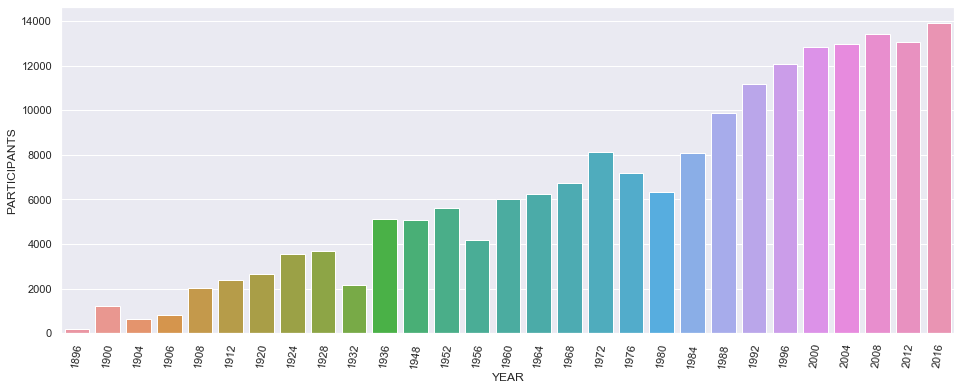

In [34]:
groupedYearID = df.groupby(['Year','ID'],as_index=False).count()[['Year','ID']]  #Group the participants by year
groupedYearID = groupedYearID.groupby('Year',as_index=False).count() #No. of participants every year
l = []
for i in [1994,1998,2002,2006,2010,2014]: #The year of winter olympics
    l.append(groupedYearID[groupedYearID.Year == i].index[0]) #Combine winter and summer
for i in l:
    groupedYearID.loc[i,'Year'] = groupedYearID.loc[i,'Year'] +2
groupedYearID = groupedYearID.groupby('Year',as_index=False).sum()
sns.set(rc={'figure.figsize':(16,6)})
plot1 = sns.barplot('Year','ID',data=groupedYearID).set_xticklabels(groupedYearID.Year,rotation=82)
#plot1.set(xlabel='YEAR',ylabel='Number of people')
plt1.xlabel("YEAR")
plt1.ylabel("PARTICIPANTS")
plt1.show()

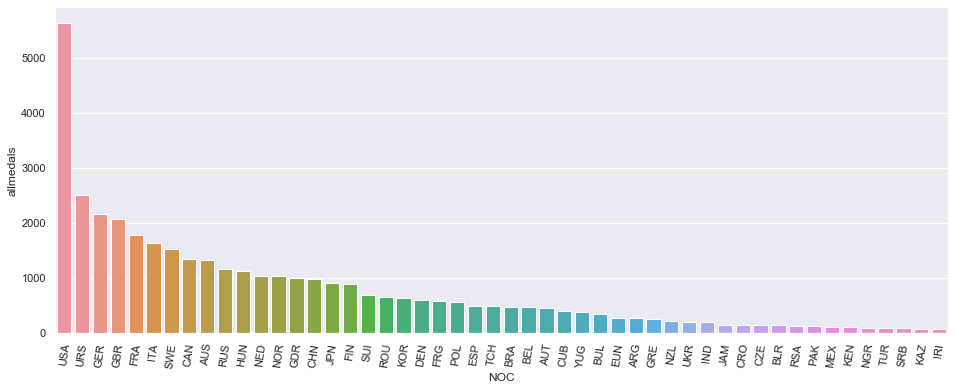

In [35]:
df = pd.concat([df,pd.get_dummies(df.Medal)],axis=1)
df['allmedals'] = df['allmedals'] = df['Bronze'] + df['Gold'] + df['Silver']
groupcountry = df.groupby(by=['NOC'],as_index= False).sum()
top50 = groupcountry.sort_values(by=['allmedals'],ascending = False).head(50)
plot2 = sns.barplot('NOC','allmedals',data=top50).set_xticklabels(top50.NOC,rotation=82)

In [71]:
print("Weight statures")

Weight statures


In [72]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.read_csv("athlete_events.csv")
male_df = df[df.Sex=='M']#Weights and Statures
sport_weight_height_metrics = male_df.groupby(['Sport'])['Weight','Height'].agg(
  ['min','max','mean'])
sport_weight_height_metrics.Weight.dropna().sort_values('mean', ascending=False)[:5]

#what sports have the heaviest and tallest players, which have the lightest or shortest.
#both height  & weight are heavily dependent on sex,data on the male athletes>female ones,this analysis on the male ones.


,min,max,mean
Sport,,,
Tug-Of-War,75.0,118.0,95.615385
Basketball,59.0,156.0,91.683529
Rugby Sevens,65.0,113.0,91.006623
Bobsleigh,55.0,145.0,90.387385
Beach Volleyball,62.0,110.0,89.512821


In [73]:
male_df = df[df.Sex=='M']
sport_weight_height_metrics = male_df.groupby(['Sport'])['Weight','Height'].agg(['min','max','mean'])

In [74]:
sport_weight_height_metrics.Weight.dropna().sort_values('mean', ascending=False)

,min,max,mean
Sport,,,
Tug-Of-War,75.0,118.0,95.615385
Basketball,59.0,156.0,91.683529
Rugby Sevens,65.0,113.0,91.006623
Bobsleigh,55.0,145.0,90.387385
Beach Volleyball,62.0,110.0,89.512821
Handball,62.0,132.0,89.387914
Water Polo,61.0,125.0,87.706172
Volleyball,56.0,120.0,86.925926
Baseball,38.0,120.0,85.707792


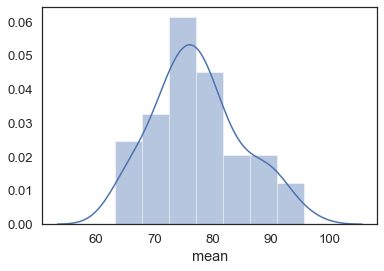

In [75]:
sns.distplot(sport_weight_height_metrics.Weight.dropna()['mean']) #for weight

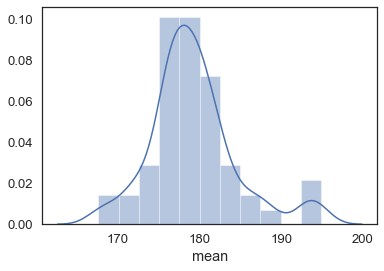

In [76]:
sns.distplot(sport_weight_height_metrics.Height.dropna()['mean']) #for height

In [54]:
print("Normalisation")

Normalisation


In [55]:
import math 
from math import factorial as fact
from sklearn import preprocessing
%matplotlib inline

In [56]:
df_I=df.interpolate()
normalized_Height=(df_I["Height"]-df_I["Height"].mean())/df_I["Height"].std()
normalized_Height = pd.DataFrame(normalized_Height)
normalized_Height

,Height
0,0.433507
1,-0.566113
2,-0.066303
3,0.433507
4,0.933317
5,0.933317
6,0.933317
7,0.933317
8,0.933317
9,0.933317


In [57]:
normalized_Height.describe()

,Height
count,2.711160e+05
mean,-5.676151e-15
std,1.000000e+00
min,-4.864478e+00
25%,-6.660747e-01
50%,2.919538e-02
75%,6.586931e-01
max,5.031758e+00


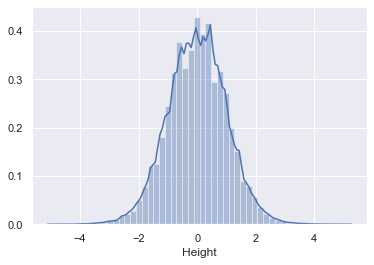

In [58]:
sns.distplot(normalized_Height["Height"])

In [59]:
print("Normalisation weight")

Normalisation weight


In [60]:
normalized_Weight=(df_I["Weight"]-df_I["Weight"].mean())/df_I["Weight"].std()
normalized_Weight = pd.DataFrame(normalized_Weight)
normalized_Weight

,Weight
0,0.651514
1,-0.814167
2,-0.276751
3,0.260666
4,0.798082
5,0.798082
6,0.798082
7,0.798082
8,0.798082
9,0.798082


In [61]:
normalized_Weight.describe()

,Weight
count,2.711160e+05
mean,-2.331331e-15
std,1.000000e+00
min,-3.379109e+00
25%,-6.675990e-01
50%,-8.132652e-02
75%,5.782300e-01
max,1.047158e+01


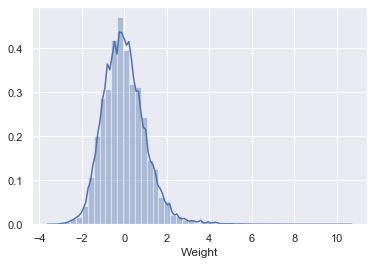

In [62]:
sns.distplot(normalized_Weight["Weight"])

In [41]:
print("Hypothesis Testing on Height")

Hypothesis Testing on Height


In [42]:
from math import sqrt
from scipy.stats import norm
import scipy
import random

In [43]:
print("Ho : μ≥175")
print("Ha : μ<175")
μ = 175

Ho : μ≥175
Ha : μ<175


In [44]:
df1=df.Height.interpolate()
sample= pd.DataFrame(df1.sample(n=100))
sample_size = 100
sample

,Height
85400,172.000000
135548,169.000000
201898,155.000000
94235,177.166667
223013,185.666667
167105,183.000000
34122,180.000000
161401,183.000000
114507,157.000000
12061,186.000000


In [45]:
sample_mean = sample.Height.mean()
sample_mean


175.7740564213564

In [46]:
sample_std = sample.Height.std()
sample_std

9.145577155062506

In [47]:
alpha = 0.05 #using alpha has 5%

In [48]:
print("z score:")
def z_score(mean,std,size,μ):
    z = (mean-μ)/(std/(size**0.5))
    print("the z score is:",z)
    return z

z score:


In [49]:
z = z_score(sample_mean,sample_std,sample_size,μ)
print("one tailed , left tailed")

the z score is: 0.8463724139355325
one tailed , left tailed


In [50]:
p_values =1- scipy.stats.norm.sf(abs(z)) #one-sided

In [51]:
p_values

0.8013274886995763

In [52]:
if(p_values < alpha):
    print("Null Hypothesis is rejected")
else:
    print("failed to reject Null Hypothesis")

failed to reject Null Hypothesis


In [53]:
#Confidence interval
a=sample_std
b=sample_size**0.5
c=sample_std/(sample_size**0.5)
d=sample_mean
e=1.645*c
lower=d-e
upper=d+e
upper = sample_mean + (1.645)*(sample_std/(sample_size**0.5))
print("Confidence Interval = (",lower,",",upper,")")

Confidence Interval = ( 174.26960897934862 , 177.27850386336416 )


In [63]:
import pingouin as pg # after pip install --upgrade pingouin

In [64]:
df2=df_I.head(2000)

In [65]:
pg.corr(x=df2['Height'], y=df2['Weight'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,2000,0.738,"[0.72, 0.76]",0.544,0.544,0.0,inf,1.0


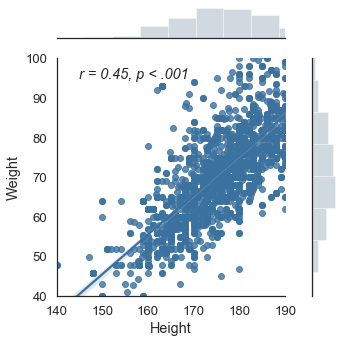

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
sns.set(style='white', font_scale=1.2)

g = sns.JointGrid(data=df2, x='Height', y='Weight', xlim=(140, 190), ylim=(40, 100), height=5)
g = g.plot_joint(sns.regplot, color="xkcd:muted blue")
g = g.plot_marginals(sns.distplot, kde=False, bins=12, color="xkcd:bluey grey")
g.ax_joint.text(145, 95, 'r = 0.45, p < .001', fontstyle='italic')
plt.tight_layout()

In [67]:
df1=df_I.head(70)# sample size=70

In [68]:
pg.corr(x=df1['Height'], y=df1['Weight'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,70,0.456,"[0.25, 0.62]",0.208,0.184,0.000074,328.321,0.982


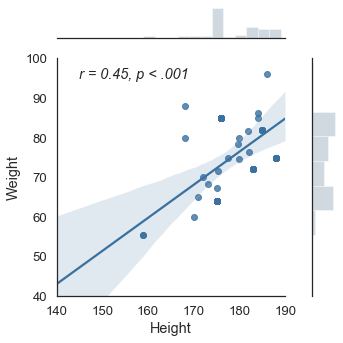

In [69]:
sns.set(style='white', font_scale=1.2)

g = sns.JointGrid(data=df1, x='Height', y='Weight', xlim=(140, 190), ylim=(40, 100), height=5)
g = g.plot_joint(sns.regplot, color="xkcd:muted blue")
g = g.plot_marginals(sns.distplot, kde=False, bins=12, color="xkcd:bluey grey")
g.ax_joint.text(145, 95, 'r = 0.45, p < .001', fontstyle='italic')
plt.tight_layout()